# GOAL

The goal of this challenge is:

1) discover the story behind the data.

2) make suggestions.

# Challenge Description


•	Data anomaly?

•	What’s the average number of files created per user, or per day?

•	What’s the average lifespan of a file? 

•	What’s the distribution of file update period?

•	Does the version column provide any insights into user behavior or a predicts how soon after creation the file is updated?

•	What more information would you require to drive more insights from this dataset?

# Data

•	FILE_ID : a unique identifier of the file

•	USER : user_id whom the file belongs to

•	CREATED : Date on which the file was created

•	UPDATE : Date on which the file was last updated

•	DELETED : Date on which the file was deleted

•	VERSION : file version number, or number of times the file was updated

# Data Processing

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

data1=pd.read_csv('data_analyst_assignment.csv', sep="[||/]")
data2=data1[["FILE_ID","USER","CREATED","UPDATED","DELETED","VERSION"]]
data2.head()#5rows

C:\Users\wenfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,FILE_ID,USER,CREATED,UPDATED,DELETED,VERSION
0,rrT0615,3633870,2019-08-01,2019-08-14,NaN,26
1,rrT0625,2853751,2019-08-01,2019-11-19,1970-01-01,26
2,rrT0630,2538826,2019-08-01,2019-09-28,NaN,2
3,rrT0635,1642941,2019-08-01,2019-12-05,NaN,5
4,rrT0640,3635605,2019-08-01,2019-10-13,2019-10-13,1


In [2]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102133 entries, 0 to 102132
Data columns (total 6 columns):
FILE_ID    102133 non-null object
USER       102129 non-null object
CREATED    102133 non-null object
UPDATED    102133 non-null object
DELETED    28338 non-null object
VERSION    102103 non-null object
dtypes: object(6)
memory usage: 4.7+ MB


In [3]:
data2.count()

FILE_ID    102133
USER       102129
CREATED    102133
UPDATED    102133
DELETED     28338
VERSION    102103
dtype: int64

In [4]:
data2.describe()

,FILE_ID,USER,CREATED,UPDATED,DELETED,VERSION
count,102133,102129,102133,102133,28338,102103
unique,102133,10035,92,188,189,420
top,18684520,3282991,2019-08-13,2019-08-13,2019-10-25,1
freq,1,6038,5123,4405,474,27476


In [5]:
len(data2.FILE_ID.unique())

102133

In [225]:
len(data2.FILE_ID.unique())/len(data2.USER.unique())

10.176664009565563

In [6]:
data2.head(1)

,FILE_ID,USER,CREATED,UPDATED,DELETED,VERSION
0,rrT0615,3633870,2019-08-01,2019-08-14,NaN,26


In [7]:
data2.DELETED.unique()

array([nan, '1970-01-01', '2019-10-13', '2019-11-08', '2019-08-01',
       '2019-10-14', '2019-08-04', '2019-10-18', '2019-10-23',
       '2019-08-06', '2019-12-27', '2019-11-05', '2019-11-01',
       '2019-08-05', '2019-11-29', '2019-08-12', '2019-10-22',
       '2019-09-24', '2019-10-17', '2019-11-04', '2019-09-13',
       '2019-11-02', '2019-08-02', '2019-08-30', '2019-12-16',
       '2019-08-03', '2019-10-15', '2019-11-17', '2019-10-25',
       '2019-08-27', '2019-12-09', '2019-08-13', '2019-09-04',
       '2019-09-06', '2019-09-16', '2019-09-09', '2019-08-07',
       '2020-01-28', '2020-02-03', '2019-10-07', '2019-10-11',
       '2019-10-29', '2019-11-27', '2019-12-13', '2019-12-03',
       '2019-12-14', '2019-08-22', '2019-10-21', '2019-08-19',
       '2020-01-07', '2019-12-20', '2019-11-06', '2019-11-14',
       '2019-11-12', '2019-08-23', '2019-08-16', '2019-09-30',
       '2019-12-17', '2019-10-30', '2019-08-29', '2019-12-12',
       '2019-08-14', '2019-09-26', '2019-09-20', '

In [8]:
len(data2[data2["UPDATED"]<data2["CREATED"]])

0

In [9]:
len(data2["2019-08-01">data2["CREATED"]])

0

In [10]:
len(data2["2019-12-31"<data2["CREATED"]])

0

In [11]:
len(data2[data2["DELETED"]=="1970-01-01"])

259

In [12]:
data2[data2["DELETED"]=="1970-01-01"].head()

,FILE_ID,USER,CREATED,UPDATED,DELETED,VERSION
1,rrT0625,2853751,2019-08-01,2019-11-19,1970-01-01,26
500,KLp3685,2728736,2019-08-01,2019-08-01,1970-01-01,2
569,KLp4075,3161776,2019-08-01,2019-12-09,1970-01-01,2
597,KLp4290,262451,2019-08-01,2019-08-21,1970-01-01,2
2482,ffR12445,43539,2019-08-02,2019-10-14,1970-01-01,3


In [13]:
data2.loc[data2.DELETED=="1970-01-01", 'DELETED'] = data2['UPDATED']

C:\Users\wenfe\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\wenfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
data2.head()

,FILE_ID,USER,CREATED,UPDATED,DELETED,VERSION
0,rrT0615,3633870,2019-08-01,2019-08-14,NaN,26
1,rrT0625,2853751,2019-08-01,2019-11-19,2019-11-19,26
2,rrT0630,2538826,2019-08-01,2019-09-28,NaN,2
3,rrT0635,1642941,2019-08-01,2019-12-05,NaN,5
4,rrT0640,3635605,2019-08-01,2019-10-13,2019-10-13,1


In [15]:
len(data2[data2["CREATED"]>data2["DELETED"]])

0

In [16]:
len(data2[data2["UPDATED"]>data2["DELETED"]])

53

In [17]:
data2[data2["UPDATED"]>data2["DELETED"]].head(1)

,FILE_ID,USER,CREATED,UPDATED,DELETED,VERSION
1476,ffR06450,3179881,2019-08-02,2019-11-12,2019-08-06,1


In [18]:
data2.loc[data2["UPDATED"]>data2["DELETED"], 'UPDATED'] = data2['DELETED']

C:\Users\wenfe\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\wenfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
len(data2[data2["UPDATED"]>data2["DELETED"]])

0

In [20]:
data2[data2['FILE_ID']=="ffR06450"]

,FILE_ID,USER,CREATED,UPDATED,DELETED,VERSION
1476,ffR06450,3179881,2019-08-02,2019-08-06,2019-08-06,1


In [21]:
data2["CREATED"] = data2["CREATED"].astype("datetime64")

C:\Users\wenfe\Anaconda3\lib\site-packages\pandas\core\internals.py:3224: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)
C:\Users\wenfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
data2["UPDATED"] = data2["UPDATED"].astype("datetime64")

C:\Users\wenfe\Anaconda3\lib\site-packages\pandas\core\internals.py:3224: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)
C:\Users\wenfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
def get_month(x):
    return dt.datetime(x.year, x.month,1)
data2['CREATEDweek'] = data2['CREATED'].apply(get_month)
data2['UPDATEDmonth']=data2['UPDATED'].apply(get_month)
data2.head(2)

C:\Users\wenfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\wenfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,FILE_ID,USER,CREATED,UPDATED,DELETED,VERSION,CREATEDweek,UPDATEDmonth
0,rrT0615,3633870,2019-08-01,2019-08-14,NaN,26,2019-08-01,2019-08-01
1,rrT0625,2853751,2019-08-01,2019-11-19,2019-11-19,26,2019-08-01,2019-11-01


In [24]:
data2['maxupdate'] = data2['USER'].map(data2.groupby(['USER'])['UPDATEDmonth'].max())
data2['mincreated'] = data2['USER'].map(data2.groupby(['USER'])['CREATEDweek'].min())
data2.head(2)

C:\Users\wenfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\wenfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,FILE_ID,USER,CREATED,UPDATED,DELETED,VERSION,CREATEDweek,UPDATEDmonth,maxupdate,mincreated
0,rrT0615,3633870,2019-08-01,2019-08-14,NaN,26,2019-08-01,2019-08-01,2019-08-01,2019-08-01
1,rrT0625,2853751,2019-08-01,2019-11-19,2019-11-19,26,2019-08-01,2019-11-01,2019-11-01,2019-08-01


In [25]:
data2.loc[data2.groupby(['USER'])['UPDATEDmonth'].idxmax()].head(3)

,FILE_ID,USER,CREATED,UPDATED,DELETED,VERSION,CREATEDweek,UPDATEDmonth,maxupdate,mincreated
73173,18472305,100051,2019-10-03,2019-10-07,NaN,19,2019-10-01,2019-10-01,2019-10-01,2019-10-01
12645,17pp9030,1000898,2019-08-12,2019-11-22,NaN,1,2019-08-01,2019-11-01,2019-11-01,2019-08-01
71654,18447100,1002413,2019-10-02,2019-12-04,NaN,27,2019-10-01,2019-12-01,2019-12-01,2019-09-01


In [26]:
data2["VERSION"]= pd.to_numeric(data2["VERSION"], errors="coerce")
data2["VERSION"].astype(float)
data2.VERSION.max()

C:\Users\wenfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


1494.0

In [211]:
data2.CREATED.max()

Timestamp('2019-10-31 00:00:00')

In [27]:
def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
update_year, update_month, _ = get_date(data2, 'maxupdate')
cohort_year, cohort_month, _ = get_date(data2, 'mincreated')
year_diff = update_year - cohort_year
month_diff = update_month - cohort_month
data2['CohortIndex'] = year_diff * 12 + month_diff+1

C:\Users\wenfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [28]:
data2["filespan"]=(data2["UPDATED"]-data2["CREATED"]).dt.days
data2["averageupdatedday"]=data2["filespan"]/data2["VERSION"]

C:\Users\wenfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\wenfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
data2.mincreated.max()

Timestamp('2019-10-01 00:00:00')

In [30]:
#data2["UPDATEDmonth"] = data2["UPDATEDmonth"].astype("datetime64")
#data2["maxupdate"] = data2["maxupdate"].astype("datetime64")
#data2["mincreated"] = data2["mincreated"].astype("datetime64")

In [31]:
data2.head(1)

,FILE_ID,USER,CREATED,UPDATED,DELETED,VERSION,CREATEDweek,UPDATEDmonth,maxupdate,mincreated,CohortIndex,filespan,averageupdatedday
0,rrT0615,3633870,2019-08-01,2019-08-14,NaN,26.0,2019-08-01,2019-08-01,2019-08-01,2019-08-01,1.0,13,0.5


In [32]:
data2['USER'].nunique()

10035

#  Data Visualization

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt



Daily file create visualization:

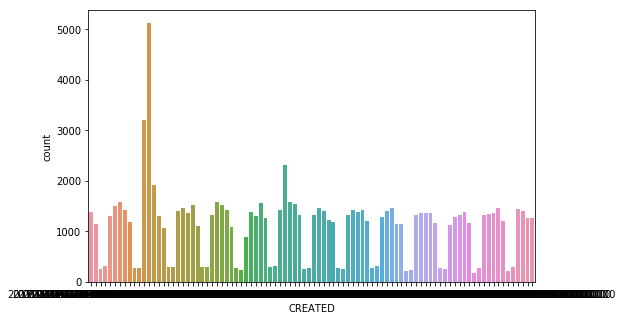

In [34]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x='CREATED',data=data2,ax=ax) 
plt.show()



Number of created files by each day:

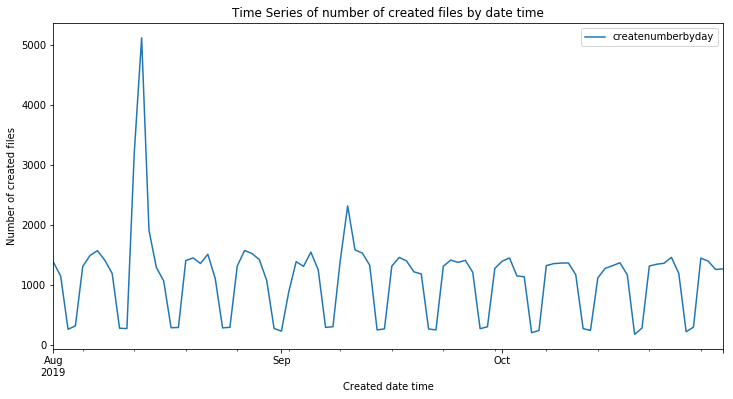

In [35]:
df0= data2.groupby('CREATED')['FILE_ID'].nunique().reset_index()
df0['createnumberbyday']=df0['FILE_ID']
#df0.head()
df0.plot(x='CREATED', y='createnumberbyday', figsize=(12,6))
plt.xlabel('Created date time')
plt.ylabel('Number of created files')
plt.title('Time Series of number of created files by date time')
plt.show()



Number of files created per user and per day 

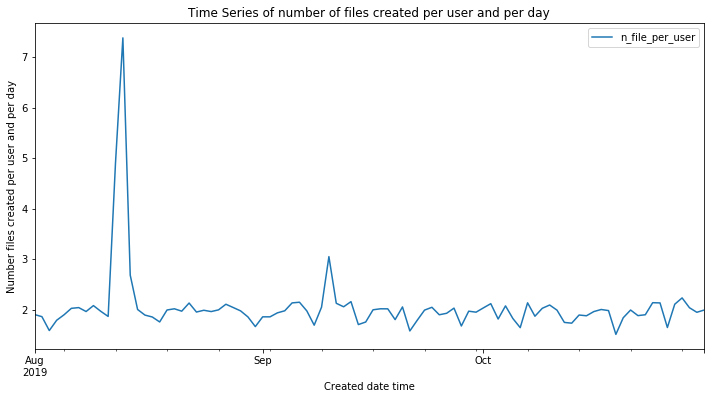

In [36]:
df00= data2.groupby('CREATED')['USER'].nunique().reset_index()
df0['n_user']=df00['USER']
df0['n_file_per_user']=df0['createnumberbyday']/df0['n_user']
df0.plot(x='CREATED', y='n_file_per_user', figsize=(12,6))
plt.xlabel('Created date time')
plt.ylabel('Number files created per user and per day')
plt.title('Time Series of number of files created per user and per day')
plt.show()

In [37]:
df0.head(2)

,CREATED,FILE_ID,createnumberbyday,n_user,n_file_per_user
0,2019-08-01,1386,1386,729,1.901235
1,2019-08-02,1149,1149,618,1.859223




Average number of files created per user in different month:

In [38]:
dffm=data2.groupby(data2["CREATED"].dt.month)['FILE_ID'].nunique().reset_index()
dffm['m_files']=dffm['FILE_ID']
dffm0=data2.groupby(data2["CREATED"].dt.month)['USER'].nunique().reset_index()
dffm['m_users']=dffm0['USER']
dffm['m_files_per_user']=dffm['m_files']/dffm['m_users']
dffm

,CREATED,FILE_ID,m_files,m_users,m_files_per_user
0,8,38481,38481,5853,6.574577
1,9,31632,31632,5479,5.773316
2,10,32020,32020,5270,6.075901


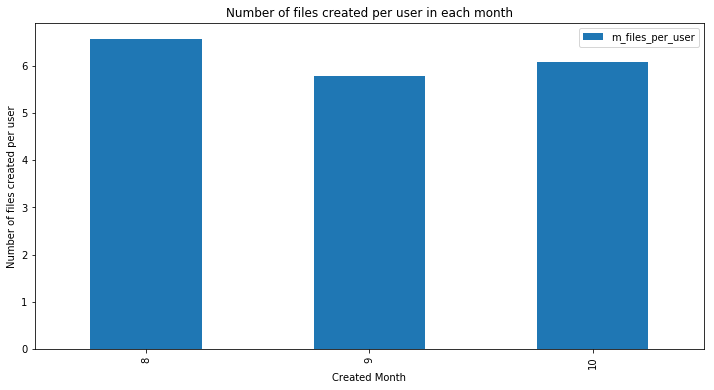

In [39]:
dffm.plot(kind='bar',x='CREATED', y='m_files_per_user', figsize=(12,6))
plt.xlabel('Created Month')
plt.ylabel('Number of files created per user')
plt.title('Number of files created per user in each month')
plt.show()



Top 10 user of files created:

In [223]:
dff= data2.groupby('USER')['FILE_ID'].nunique().reset_index()
dff['n_files']=df00['USER']
dff0=dff.sort_values(by='n_files',ascending=False)
dff1=dff0.head(10)
dff1

,USER,FILE_ID,n_files
6,1005473,4,772.0
40,1023008,11,761.0
26,1015868,14,749.0
27,1016358,3,748.0
41,1024803,9,747.0
42,1024988,15,746.0
5,1004858,13,739.0
56,1033333,14,733.0
0,100051,1,729.0
68,1041598,21,727.0


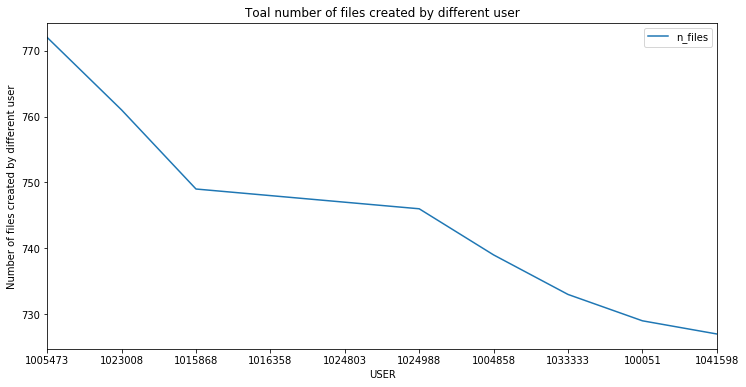

In [41]:
dff1.plot(x='USER', y='n_files', figsize=(12,6))
plt.xlabel('USER')
plt.ylabel('Number of files created by different user')
plt.title('Toal number of files created by different user')
plt.show()



New user of each month:

In [50]:
dfnew= data2.groupby('mincreated')['USER'].nunique().reset_index() #groupby(data2["mincreated"]
dfnew['createduser']=dfnew['USER']
dfnew['createdmonth']=dfnew['mincreated'].dt.month
dfnew=dfnew[['createdmonth','createduser','mincreated']]
dfnew

,createdmonth,createduser,mincreated
0,8,5853,2019-08-01
1,9,2464,2019-09-01
2,10,1718,2019-10-01


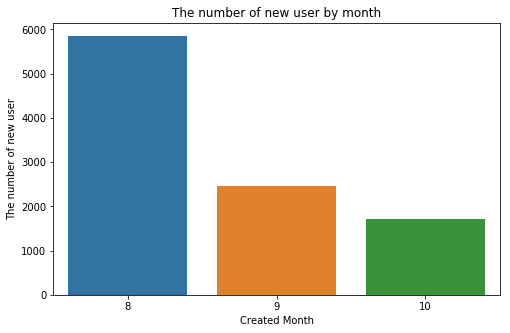

In [43]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='createdmonth', y='createduser', data=dfnew, ax=ax)
plt.xlabel('Created Month')
plt.ylabel('The number of new user')
plt.title('The number of new user by month')
plt.show()

In [44]:
data3=data2[['USER','CREATED','UPDATED','DELETED','VERSION','filespan','averageupdatedday']]
data3.head()

,USER,CREATED,UPDATED,DELETED,VERSION,filespan,averageupdatedday
0,3633870,2019-08-01,2019-08-14,NaN,26.0,13,0.500000
1,2853751,2019-08-01,2019-11-19,2019-11-19,26.0,110,4.230769
2,2538826,2019-08-01,2019-09-28,NaN,2.0,58,29.000000
3,1642941,2019-08-01,2019-12-05,NaN,5.0,126,25.200000
4,3635605,2019-08-01,2019-10-13,2019-10-13,1.0,73,73.000000


In [45]:
len(data3[data3['VERSION']>1])

74436

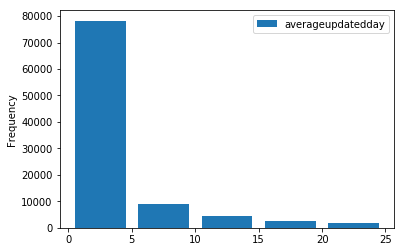

In [46]:

data3[['averageupdatedday']].plot(kind='hist',bins=[0,5,10,15,20,25],rwidth=0.8)
plt.show()

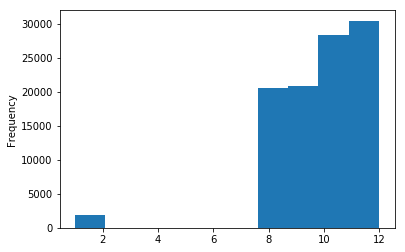

In [47]:
data3['UPDATED'].map(lambda d: d.month).plot(kind='hist')
plt.show()

# Exploratory Data Analysis

### Cohort Analysis: User number & Retention Rate


The first cohort I use here is the number of active users. I use groupby and pivot table functions.

In [48]:
cohort_data = data2.groupby(['mincreated', 'CohortIndex'])['USER'].apply(pd.Series.nunique).reset_index()
cohort_data['churn_number_of_user']=cohort_data['USER']
cohort_data1=cohort_data[['mincreated','CohortIndex','churn_number_of_user']]
cohort_data1

,mincreated,CohortIndex,churn_number_of_user
0,2019-08-01,1.0,675
1,2019-08-01,2.0,266
2,2019-08-01,3.0,954
3,2019-08-01,4.0,1408
4,2019-08-01,5.0,1873
5,2019-08-01,6.0,561
6,2019-08-01,7.0,116
7,2019-09-01,1.0,474
8,2019-09-01,2.0,326
9,2019-09-01,3.0,596


In [51]:
cohort2= pd.merge(cohort_data1,dfnew,left_on='mincreated',right_on='mincreated', how='inner')
cohort2['churn_number_of_user']=cohort2.groupby('mincreated').churn_number_of_user.shift(1)
cohort2.loc[cohort2.CohortIndex==1.0, 'churn_number_of_user'] = 0
cohort2.head()

,mincreated,CohortIndex,churn_number_of_user,createdmonth,createduser
0,2019-08-01,1.0,0.0,8,5853
1,2019-08-01,2.0,675.0,8,5853
2,2019-08-01,3.0,266.0,8,5853
3,2019-08-01,4.0,954.0,8,5853
4,2019-08-01,5.0,1408.0,8,5853


In [52]:
cohort2['churntotal']=cohort2.groupby(['mincreated']).churn_number_of_user.cumsum()
cohort2['rentation']=cohort2['createduser']-cohort2['churntotal']
cohort2=cohort2[cohort2['CohortIndex']<cohort2.CohortIndex.max()]
cohort2['rentationrate']=(cohort2['createduser']-cohort2['churntotal'])/cohort2['createduser']
cohort2

,mincreated,CohortIndex,churn_number_of_user,createdmonth,createduser,churntotal,rentation,rentationrate
0,2019-08-01,1.0,0.0,8,5853,0.0,5853.0,1.000000
1,2019-08-01,2.0,675.0,8,5853,675.0,5178.0,0.884675
2,2019-08-01,3.0,266.0,8,5853,941.0,4912.0,0.839228
3,2019-08-01,4.0,954.0,8,5853,1895.0,3958.0,0.676234
4,2019-08-01,5.0,1408.0,8,5853,3303.0,2550.0,0.435674
5,2019-08-01,6.0,1873.0,8,5853,5176.0,677.0,0.115667
7,2019-09-01,1.0,0.0,9,2464,0.0,2464.0,1.000000
8,2019-09-01,2.0,474.0,9,2464,474.0,1990.0,0.807630
9,2019-09-01,3.0,326.0,9,2464,800.0,1664.0,0.675325
10,2019-09-01,4.0,596.0,9,2464,1396.0,1068.0,0.433442


In [53]:
cohort_count = cohort2.pivot_table(index = 'mincreated',
                                       columns = 'CohortIndex',
                                       values = 'rentation')
cohort_count

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0
mincreated,,,,,,
2019-08-01,5853.0,5178.0,4912.0,3958.0,2550.0,677.0
2019-09-01,2464.0,1990.0,1664.0,1068.0,111.0,19.0
2019-10-01,1718.0,1062.0,445.0,1.0,NaN,NaN


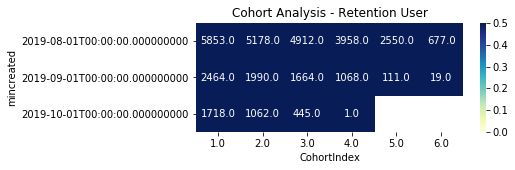

In [220]:
plt.figure(figsize = (6,2))
plt.title('Cohort Analysis - Retention User')
sns.heatmap(data = cohort_count, 
            annot = True, 
            fmt='',
            vmin = 0.0,
            vmax = 0.5,
            cmap = "YlGnBu")
plt.show()


From the result above, the first column in the chart is active user number on that specific month, and the following columns show how the many remaining users are still using the service on the second and third month. The 7th column and 2019–08–1 row means 677 users out of 5853 users were still engaged with the web after the 6 months from 2019–08–1.

In [54]:
cohort_rentationrate = cohort2.pivot_table(index = 'mincreated',
                                       columns = 'CohortIndex',
                                       values = 'rentationrate')
cohort_rentationrate

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0
mincreated,,,,,,
2019-08-01,1.0,0.884675,0.839228,0.676234,0.435674,0.115667
2019-09-01,1.0,0.807630,0.675325,0.433442,0.045049,0.007711
2019-10-01,1.0,0.618161,0.259022,0.000582,NaN,NaN


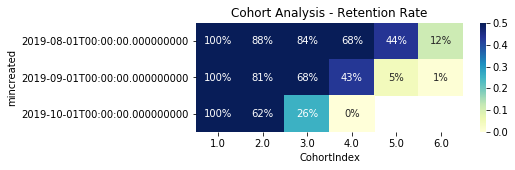

In [55]:
plt.figure(figsize = (6,2))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(data = cohort_rentationrate, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.5,
            cmap = "YlGnBu")
plt.show()

### File lifespan Analysis


In [56]:
filtered_df = data3[data3['DELETED'].notnull()]
filtered_df.head()
len(filtered_df)

28338

In [57]:
data3.head()

,USER,CREATED,UPDATED,DELETED,VERSION,filespan,averageupdatedday
0,3633870,2019-08-01,2019-08-14,NaN,26.0,13,0.500000
1,2853751,2019-08-01,2019-11-19,2019-11-19,26.0,110,4.230769
2,2538826,2019-08-01,2019-09-28,NaN,2.0,58,29.000000
3,1642941,2019-08-01,2019-12-05,NaN,5.0,126,25.200000
4,3635605,2019-08-01,2019-10-13,2019-10-13,1.0,73,73.000000


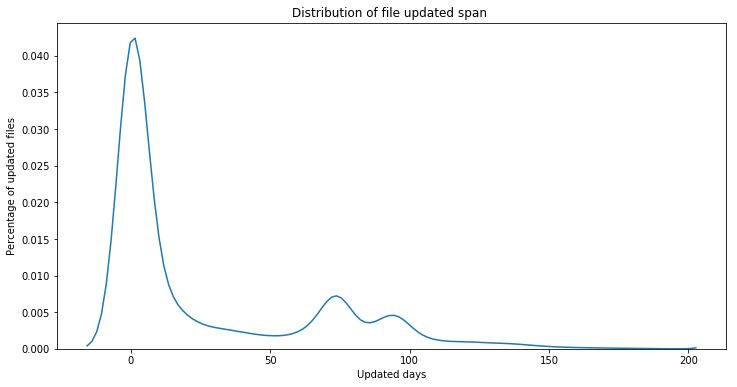

In [72]:
plt.figure(figsize = (12,6))
sns.distplot(filtered_df['filespan'],hist=False,bins=10)
plt.xlabel('Updated days')
plt.ylabel('Percentage of updated files')
plt.title('Distribution of file updated span ')
plt.show()


To analyze the lifespan of files, I only consider records that the DELETE column is not null.

In [229]:
filtered_df.filespan.sum()/len(filtered_df)

26.733714447032252

### File updated Analysis

Here, I selected the rows that updated at least 1 time after creating to analyze the updated file.

In [59]:
len(data3[data3['VERSION']>1])

74436

In [60]:
data4=data3[data3['VERSION']>1]
data4.head()

,USER,CREATED,UPDATED,DELETED,VERSION,filespan,averageupdatedday
0,3633870,2019-08-01,2019-08-14,NaN,26.0,13,0.500000
1,2853751,2019-08-01,2019-11-19,2019-11-19,26.0,110,4.230769
2,2538826,2019-08-01,2019-09-28,NaN,2.0,58,29.000000
3,1642941,2019-08-01,2019-12-05,NaN,5.0,126,25.200000
5,268126,2019-08-01,2019-11-08,2019-11-08,49.0,99,2.020408


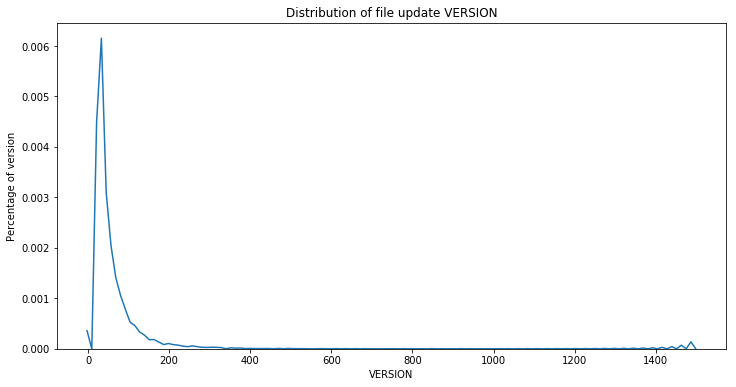

In [73]:
plt.figure(figsize = (12,6))
sns.distplot(data4['VERSION'],hist=False,bins=10)
plt.xlabel('VERSION')
plt.ylabel('Percentage of version')
plt.title('Distribution of file update VERSION')
plt.show()

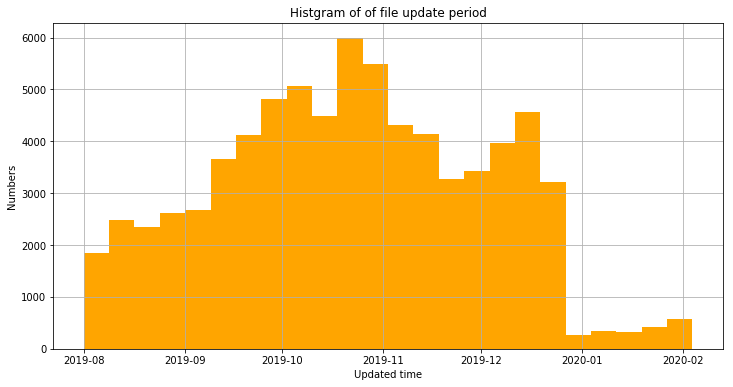

In [74]:
plt.figure(figsize = (12,6))
data4['UPDATED'].hist(bins=24,color='orange')
plt.xlabel('Updated time')
plt.ylabel('Numbers')
plt.title('Histgram of of file update period')
plt.show()

# Predictive Analysis-Moving average forecasting

#### Select one single user which has the most VERSION times.

In [79]:
s1=data2.groupby(['USER']).VERSION.sum().sort_values(ascending=False)
s1.head()

USER
2585131    11529.0
3419865     6984.0
1357498     6421.0
3297596     6113.0
3282991     6038.0
Name: VERSION, dtype: float64

Here, the user who has most file version number is '2585131'.

In [200]:
dataselected1=data2[data2['USER']=='2585131']
dataselected1.head()

,FILE_ID,USER,CREATED,UPDATED,DELETED,VERSION,CREATEDweek,UPDATEDmonth,maxupdate,mincreated,CohortIndex,filespan,averageupdatedday
57,rrT5030,2585131,2019-08-01,2019-09-22,NaN,2.0,2019-08-01,2019-09-01,2020-01-01,2019-08-01,6.0,52,26.00000
85,rrT8165,2585131,2019-08-01,2019-09-22,NaN,2.0,2019-08-01,2019-09-01,2020-01-01,2019-08-01,6.0,52,26.00000
104,rrT9820,2585131,2019-08-01,2019-08-01,NaN,1.0,2019-08-01,2019-08-01,2020-01-01,2019-08-01,6.0,0,0.00000
105,rrT9925,2585131,2019-08-01,2019-10-07,NaN,43.0,2019-08-01,2019-10-01,2020-01-01,2019-08-01,6.0,67,1.55814
313,KLp2620,2585131,2019-08-01,2019-08-01,NaN,1.0,2019-08-01,2019-08-01,2020-01-01,2019-08-01,6.0,0,0.00000


In [201]:
#dataselected1.describe()

In [253]:
d2=dataselected1[['CREATED','averageupdatedday']]
d2.head(1)

,CREATED,averageupdatedday
57,2019-08-01,26.0


In [254]:
d2['03d-SMA']=d2['averageupdatedday'].rolling(window=3).mean()
d2['06d-SMA']=d2['averageupdatedday'].rolling(window=6).mean()
d2['09d-SMA']=d2['averageupdatedday'].rolling(window=9).mean()
d2['12d-SMA']=d2['averageupdatedday'].rolling(window=12).mean()

C:\Users\wenfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\wenfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\wenfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

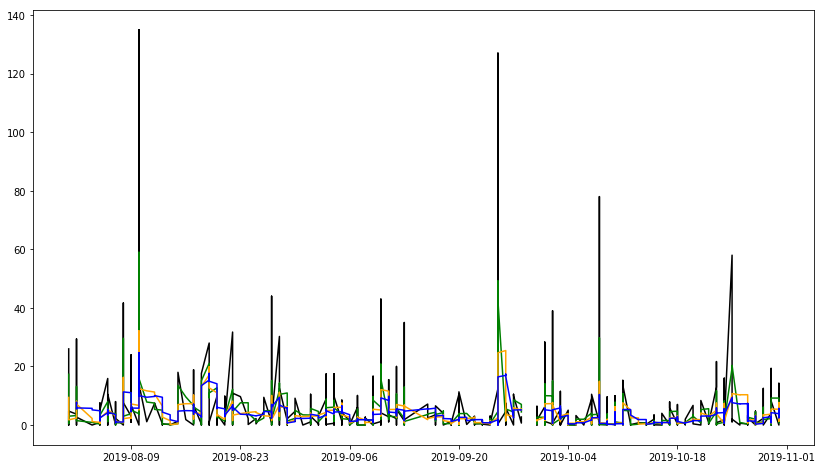

In [255]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
ax.plot(d2.CREATED,d2['averageupdatedday'],color='black',label='averageupdatedday')
ax.plot(d2.CREATED,d2['03d-SMA'],color='green',label='03d-SMA')
ax.plot(d2.CREATED,d2['06d-SMA'],color='orange',label='06d-SMA')
ax.plot(d2.CREATED,d2['09d-SMA'],color='blue',label='09d-SMA')
#ax.plot(d2.CREATED,d2['12d-SMA'],color='cyan',label='12d-SMA')
plt.show()


From the above part, I found that the green line is more close to real data, so we pick d2['03d-SMA'] to predict.

In [265]:
predict=d2.tail(3)['03d-SMA'].sum()/len(d2.tail(3))
predict

3.2076719576719483

Therefore, the USER(2585131) will update file in 3.2 days after the creation. 

# Conclusion

•	The number of new user is decreasing(Aug 5853, Sep 2464, Oct 1718), the number of created file is declined.

•	User generated highest number of files from August 10 to 14.

•	Top 10 user created files(727 to 772) between 2019-08-01 and 2019-10-31.

•	The average number of files created per user is 10.18 files.

•	To analyze the lifespan of files, I only consider records that the DELETE column is not null. I found that the average           lifespan of a file is around 27 days.

•	The VERSION column provide some insights about engagement, and I use the value of VERSION to predict how soon the specific       user will update after creation the file.

•	The USER(2585131) will update file in 3.2 days after the creation. 



# Suggestions

•	Attract more new user.

•	Improve the user engagemnt.

•	Find the reasons that User generated highest number of files from August 10 to 14.

•	Collect more useful feature which may include:.

        1) the updated time when the file was updated
   
        2) the upload file time
   
        3) the time of user working on the file
   
        4) the user's information
   
        5) the kind of browser